In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rating=pd.read_csv('BX-Book-Ratings.csv')
book=pd.read_csv('BX-Books.csv')
user=pd.read_csv('BX-Users.csv')

In [546]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276762,3404122879,0
1,276762,3404182928,0
2,276762,3426690179,0
3,276762,3442424216,0
4,276762,3442425573,0


In [547]:
rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [548]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
1,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...
2,013022393X,All the Best Salads and Salad Dressings,J. Warner,1911,Prentice Hall Direct,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...
3,030758013X,Assorted Small Tray Puzzles,Golden,1920,Golden Books,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...
4,082493069X,Grill and Barbecue Cooking,Ideals Publications Inc,1920,Ideals Publications,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...


In [549]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44365 entries, 0 to 44364
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 44365 non-null  object
 1   Book-Title           44365 non-null  object
 2   Book-Author          44364 non-null  object
 3   Year-Of-Publication  44365 non-null  int64 
 4   Publisher            44365 non-null  object
 5   Image-URL-S          44357 non-null  object
 6   Image-URL-M          44362 non-null  object
 7   Image-URL-L          44361 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.7+ MB


In [550]:
book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              0
Image-URL-S            8
Image-URL-M            3
Image-URL-L            4
dtype: int64

In [551]:
# 책 이미지 url은 필요없을거 같아서 제거

book=book.iloc[:,:5]

In [552]:
book.loc[book['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
15432,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [553]:
# 책 이름으로 검색해서 저자명 채워넣기

book.loc[book['ISBN']=='9627982032','Book-Author']='Larissa Anne Downe'

In [554]:
book.loc[book['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [555]:
print(sorted(book['Year-Of-Publication'].unique()))

[1378, 1900, 1911, 1920, 1921, 1923, 1926, 1928, 1929, 1930, 1931, 1936, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2020, 2026]


In [556]:
book.loc[book['Year-Of-Publication']==1378]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus


In [557]:
# 검색해서 제대로 된 발행년도로 수정 

book.loc[book['Year-Of-Publication']==1378,'Year-Of-Publication'] = 2010

In [558]:
book.loc[book['Year-Of-Publication']==2026]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
44318,3442436893,Das gro??e B?쨋se- M?짚dchen- Lesebuch.,Kathy Lette,2026,Goldmann


In [559]:
# 검색해서 제대로 된 발행년도로 수정 

book.loc[book['Year-Of-Publication']==2026,'Book-Title']='Das grosse Böse-Mädchen Lesebuch'
book.loc[book['Year-Of-Publication']==2026, 'Year-Of-Publication']=1996

In [560]:
print(sorted(book['Year-Of-Publication'].unique()))

[1900, 1911, 1920, 1921, 1923, 1926, 1928, 1929, 1930, 1931, 1936, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 2020]


In [561]:
book.loc[book['Year-Of-Publication']==2020]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
44315,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch &amp Lombard
44316,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp Lombard
44317,068471941X,LOOK HOMEWARD ANGEL,T Wolfe,2020,Scribner Paper Fiction


In [562]:
# 검색해서 제대로 된 발행년도로 수정 

book.loc[book['ISBN']=='068107468X', 'Year-Of-Publication']=1998
book.loc[book['ISBN']=='068160204X', 'Year-Of-Publication']=1997
book.loc[book['ISBN']=='068471941X', 'Year-Of-Publication']=1920

In [563]:
#중복된 ISBN 책들 첫번째만 남김

print('Unique ISBN :', book['ISBN'].nunique())
print('ISBN :', book['ISBN'].count())

Unique ISBN : 44133
ISBN : 44365


In [564]:
book[book.duplicated(keep=False)].head(6)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
47,039309426X,How to Lie With Statistics,Darrell Huff,1954,W. W. Norton &amp Company
48,039309426X,How to Lie With Statistics,Darrell Huff,1954,W. W. Norton &amp Company
58,015694877X,The Waste Land and Other Poems,T. S. Eliot,1955,Harvest Books
59,015694877X,The Waste Land and Other Poems,T. S. Eliot,1955,Harvest Books
77,039480001X,The Cat in the Hat,Dr. Seuss,1957,Random House Books for Young Readers
78,039480001X,The Cat in the Hat,Dr. Seuss,1957,Random House Books for Young Readers


In [565]:
book.drop_duplicates(keep='first',inplace=True)
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,2010,Intisharat-i Quqnus
1,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
2,013022393X,All the Best Salads and Salad Dressings,J. Warner,1911,Prentice Hall Direct
3,030758013X,Assorted Small Tray Puzzles,Golden,1920,Golden Books
4,082493069X,Grill and Barbecue Cooking,Ideals Publications Inc,1920,Ideals Publications
...,...,...,...,...,...
44360,B00007MF56,"More, Now, Again: A Memoir of Addiction",Elizabeth Wurtzel,2001,Simon &amp Schuster
44361,B00007CWGV,Madonna,Andrew Morton,2001,St. Martin's Press
44362,B000078UH8,The Hearing,John T. Lescroart,2001,E P Dutton
44363,B00006JO6O,The Last Precinct,Patricia Daniels Cornwell,2000,Putnam Pub Group


#### 출판년도 top 10,  plot

In [566]:
top_published = book['Year-Of-Publication'].value_counts()[:10]
print(top_published)

2002    4264
2000    3971
2001    3964
1999    3709
2003    3332
1998    3313
1997    2855
1996    2464
1995    2283
1994    1812
Name: Year-Of-Publication, dtype: int64


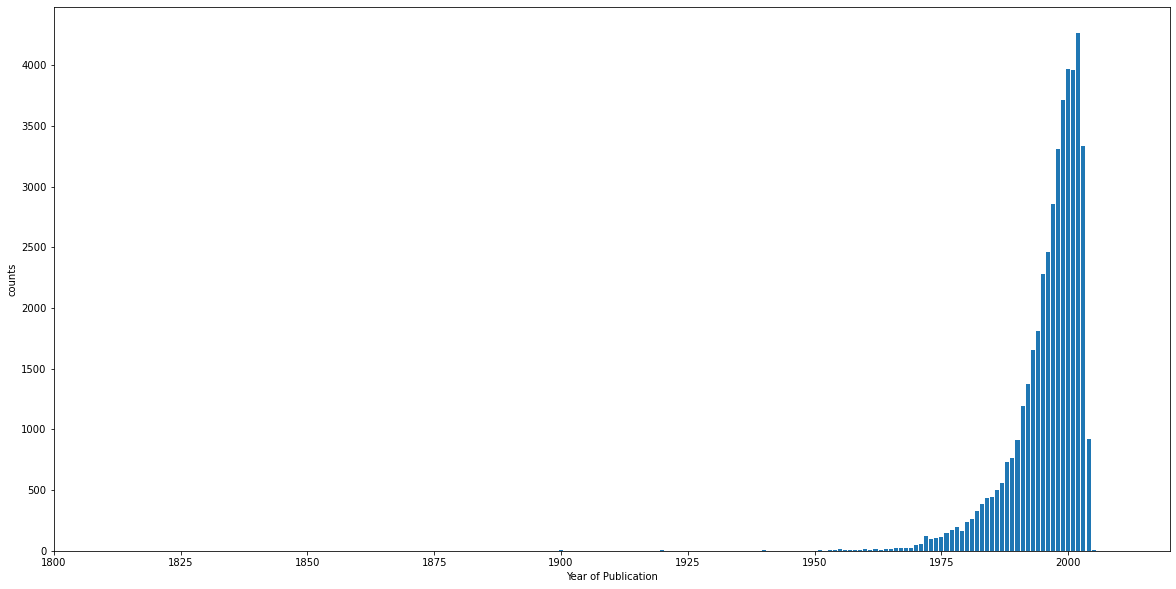

In [567]:
year=book['Year-Of-Publication'].value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.xlim(1800,2020)
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts');

#### 출판 수 top 10
#### L?쩌bbe가 독일어인데 깨지는 부분은 처리 방법이 우선 없어서 그대로 둠

In [568]:
top_publishers = book['Publisher'].value_counts()[:10]
print(top_publishers)

Goldmann       760
Gallimard      640
Harlequin      597
Heyne          587
Mira           501
Pocket         480
L?쩌bbe         445
LGF            419
Rowohlt Tb.    398
Silhouette     343
Name: Publisher, dtype: int64


#### 다작  top 100

In [569]:
top_authors = book['Book-Author'].value_counts()[:10]
print(top_authors)

Stephen King            141
Agatha Christie         139
William Shakespeare      89
Terry Pratchett          83
Jack Canfield            80
Not Applicable (Na )     63
Mary Higgins Clark       59
Nora Roberts             55
Isaac Asimov             53
John Grisham             51
Name: Book-Author, dtype: int64


#### 작가명이 Not Applicable (Na ) 인 것은 추후 ISBN 검색해서 채울 예정 <- 논의 필요

In [570]:
book.loc[book['Book-Author']=='Not Applicable (Na )']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
1162,051724313X,Puzzles for Pleasure (Bell),Not Applicable (Na ),1978,Random House Value Pub
2504,069600805X,Better Homes and Gardens Treasury of Country C...,Not Applicable (Na ),1983,Meredith Books
3657,039455258X,The Best of Gourmet: 1986 Edition : All of the...,Not Applicable (Na ),1986,Random House Inc
3803,080945257X,Fall of Camelot (Enchanted World),Not Applicable (Na ),1986,Warner Books Inc
3804,080945808X,Fresh Ways With Vegetables (Healthy Home Cooki...,Not Applicable (Na ),1986,Warner Books Inc
...,...,...,...,...,...
40523,078949387X,France (Eyewitness Travel Guides),Not Applicable (Na ),2003,Dorling Kindersley Publishing
40794,1402200684,Best of Friends: A Coupon Gift of Love and Tha...,Not Applicable (Na ),2003,Sourcebooks
40993,1552854582,Five Roses: A Guide to Good Cooking,Not Applicable (Na ),2003,Whitecap Books
43312,8495273829,HD: Holland Design--New Graphics,Not Applicable (Na ),2003,Actar


#### ISBN은 고유하지만 책 제목, 작가, 출판년도, 출판사가 동일한 케이스들이 존재, 처리방법 논의 필요

In [571]:
top_titles = book['Book-Title'].value_counts()[:10]
print(top_titles)

Ranma 1/2 (Ranma 1/2)              7
Heidi                              6
Frankenstein                       6
Dracula                            6
Matilda                            5
Flame Of Recca (Flame Of Recca)    5
Hannibal                           5
Siddhartha                         5
Meistererz?짚hlungen.               5
The Wind in the Willows            5
Name: Book-Title, dtype: int64


In [572]:
book.loc[book['Book-Title']=='Ranma 1/2 (Ranma 1/2)']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
14386,1569310203,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,1995,Viz Communications
41683,1591160626,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
41684,1591160634,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
41685,1591160642,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
41686,1591160650,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
43999,1591161290,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2004,Viz Communications
44000,1591161304,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2004,Viz Communications


### user, book, rating 합치기

In [608]:
user_pre=pd.read_csv('user_pre.csv')

In [574]:
book_rating=pd.merge(rating,book,on='ISBN',how='left')

In [575]:
total_data=pd.merge(user_pre,book_rating,on='User-ID',how='left')

In [576]:
total_data

,Unnamed: 0,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0,183,portugal,27.000,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A."
1,0,183,portugal,27.000,8420639133,0,Temor y Temblor,Soren Kierkegaard,2001,Alianza
2,0,183,portugal,27.000,8433920081,0,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama
3,0,183,portugal,27.000,8440630794,7,Cuentos del Planeta Tierra,Arthur C. Clarke,1993,Ediciones B
4,0,183,portugal,27.000,8476409419,8,Estudios sobre el amor,Jose Ortega Y Gaset,2001,Downtown Book Center
...,...,...,...,...,...,...,...,...,...,...
100815,5156,278851,usa,33.000,067161746X,7,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
100816,5156,278851,usa,33.000,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson
100817,5156,278851,usa,33.000,1566910102,0,Oregon Handbook (The Americas Series),Stuart Warren,1995,Pub Group West
100818,5156,278851,usa,33.000,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation


### 모두 합친 후 봤을 때 위의 고유한 ISBN에서 중복된 타이틀인 케이스들
### User-ID를 기준으로 중복처리해야할듯??

In [68]:
total_data.loc[total_data['Book-Title']=='Ranma 1/2 (Ranma 1/2)']

,Unnamed: 0,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
4127,223,13582,portugal,29.0,1569310203,0,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,1995,Viz Communications
44312,2264,124065,usa,17.0,1591160650,8,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
50381,2582,139524,usa,12.0,1591160626,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
50382,2582,139524,usa,12.0,1591160634,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
56184,2867,156111,usa,15.0,1591160650,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
56185,2867,156111,usa,15.0,1591160626,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
56186,2867,156111,usa,15.0,1591160634,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
56201,2867,156111,usa,15.0,1591160642,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2003,VIZ LLC
56204,2867,156111,usa,15.0,1591161290,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2004,Viz Communications
56205,2867,156111,usa,15.0,1591161304,10,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,2004,Viz Communications


### rating 중 65000정도가 0점인데 빼야하지 않을까 싶음

In [69]:
total_data['Book-Rating'].value_counts()

0     65267
8      8341
10     7405
7      6143
9      5734
5      3546
6      2891
4       700
3       460
2       204
1       129
Name: Book-Rating, dtype: int64

In [70]:
no_zero_rating = total_data[total_data['Book-Rating']!= 0]

In [71]:
no_zero_rating['Book-Rating'].value_counts()

8     8341
10    7405
7     6143
9     5734
5     3546
6     2891
4      700
3      460
2      204
1      129
Name: Book-Rating, dtype: int64

In [72]:
print(f'Size of book_ratings before removing zero ratings: {len(total_data)}')
print(f'Size of book_ratings after removing zero ratings: {len(no_zero_rating)}')

Size of book_ratings before removing zero ratings: 100820
Size of book_ratings after removing zero ratings: 35553


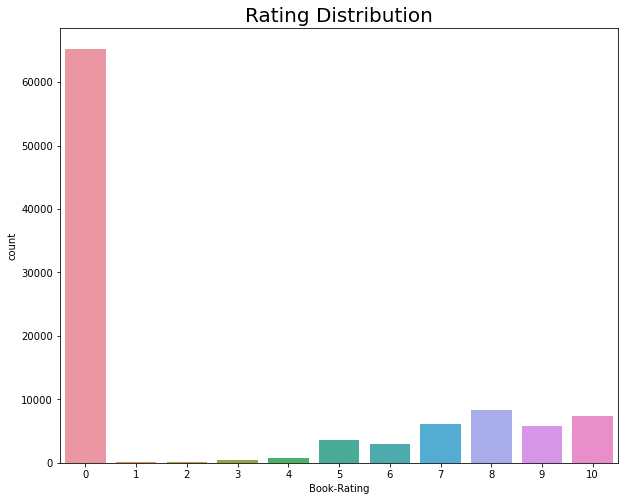

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=total_data)
plt.title('Rating Distribution',size=20)
plt.show()

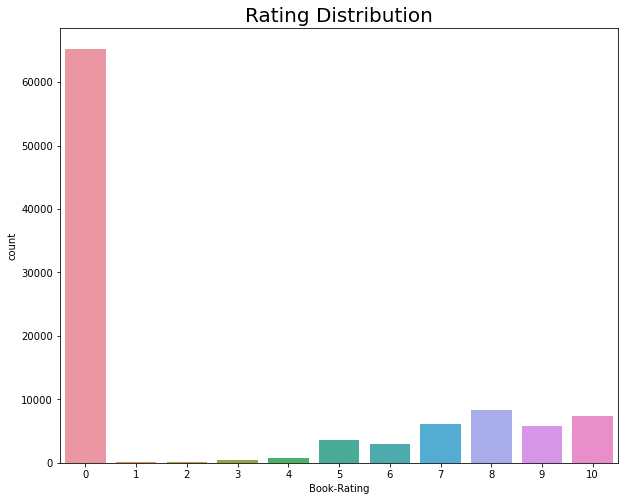

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(x='Book-Rating',data=book_rating)
plt.title('Rating Distribution',size=20)
plt.show()

### rating별 age

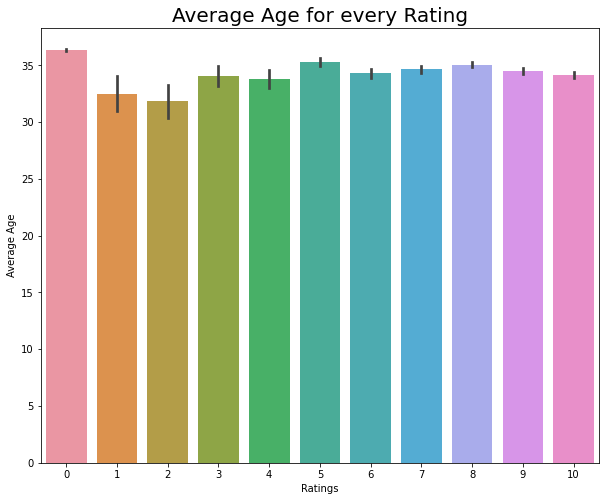

In [76]:
plt.figure(figsize=(10,8))
sns.barplot(x='Book-Rating',y='Age',data=total_data)
plt.xlabel('Ratings')
plt.ylabel('Average Age')
plt.title('Average Age for every Rating',size=20);

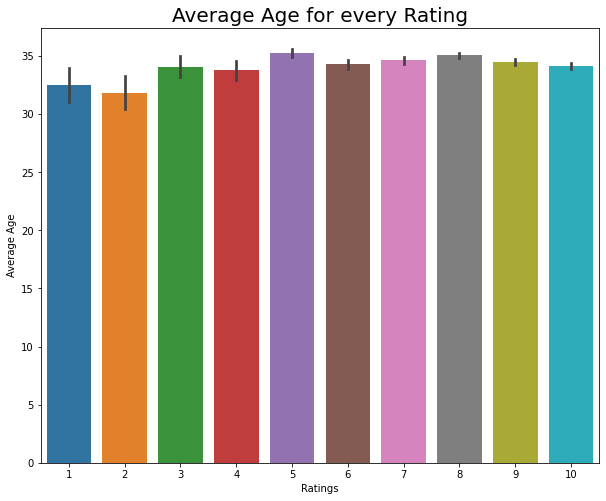

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(x='Book-Rating',y='Age',data=no_zero_rating)
plt.xlabel('Ratings')
plt.ylabel('Average Age')
plt.title('Average Age for every Rating',size=20);

In [81]:
total_data.loc[total_data['Book-Rating']>0].reset_index(drop=True).to_csv('book_data.csv',index=True)

In [609]:
user_pre

,Unnamed: 0,User-ID,Location,Age
0,0,183,portugal,27.000
1,1,242,germany,37.000
2,2,254,usa,24.000
3,3,388,usa,35.000
4,4,392,spain,44.000
...,...,...,...,...
5152,5152,278356,usa,57.000
5153,5153,278563,austria,37.000
5154,5154,278668,spain,48.000
5155,5155,278843,usa,28.000


In [5]:
combine_book_rating = pd.merge(rating,book, on='ISBN')

In [6]:
combine_book_rating=combine_book_rating.loc[combine_book_rating['Book-Rating']>0]

In [7]:
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
1,159390,3404122879,10,"Vater Himmel, Mutter Erde.",http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...
6,98707,3442424216,7,"Ich, Prinzessin aus dem Hause Al Saud. Ein Leb...",http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...
9,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...
10,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...
20,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...


In [8]:
combine_book_rating

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
1,159390,3404122879,10,"Vater Himmel, Mutter Erde.",http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...
6,98707,3442424216,7,"Ich, Prinzessin aus dem Hause Al Saud. Ein Leb...",http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...
9,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...
10,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...
20,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...
...,...,...,...,...,...,...,...
106785,261160,8429729941,8,Reflexions de sala i alcova,http://images.amazon.com/images/P/8429729941.0...,http://images.amazon.com/images/P/8429729941.0...,http://images.amazon.com/images/P/8429729941.0...
106786,261160,8432231096,7,El Pabellon De Oro,http://images.amazon.com/images/P/8432231096.0...,http://images.amazon.com/images/P/8432231096.0...,http://images.amazon.com/images/P/8432231096.0...
106787,261160,8474105706,6,La galeria de les est횪tues,http://images.amazon.com/images/P/8474105706.0...,http://images.amazon.com/images/P/8474105706.0...,http://images.amazon.com/images/P/8474105706.0...
106796,276579,043913224X,9,The Lucky Pocket Reference Book,http://images.amazon.com/images/P/043913224X.0...,http://images.amazon.com/images/P/043913224X.0...,http://images.amazon.com/images/P/043913224X.0...


In [9]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,Final Fantasy Anthology: Official Strategy Gu...,2
1,Flight of Fancy: American Heiresses (Zebra Ba...,1
2,Little Comic Shop of Horrors (Give Yourself G...,1
3,"Q-Zone (Star Trek The Next Generation, Book 48)",2
4,"Summonings: Books of Magic, Vol. 2",2


In [10]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount
0,159390,3404122879,10,"Vater Himmel, Mutter Erde.",http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...,http://images.amazon.com/images/P/3404122879.0...,1
1,98707,3442424216,7,"Ich, Prinzessin aus dem Hause Al Saud. Ein Leb...",http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...,http://images.amazon.com/images/P/3442424216.0...,1
2,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
3,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
4,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6


In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   21696.000
mean        1.725
std         4.378
min         1.000
25%         1.000
50%         1.000
75%         1.000
max       248.000
Name: totalRatingCount, dtype: float64


In [12]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    3.000
0.910    3.000
0.920    3.000
0.930    3.000
0.940    4.000
0.950    4.000
0.960    5.000
0.970    6.000
0.980    7.000
0.990   11.000
Name: totalRatingCount, dtype: float64


In [13]:
popularity_threshold = 2
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount
2,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
3,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
4,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6
5,227176,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6
6,167166,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6


In [14]:
rating_popular_book

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount
2,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
3,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2
4,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6
5,227176,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6
6,167166,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6
...,...,...,...,...,...,...,...,...
37355,179423,1570429227,7,Roses Are Red,http://images.amazon.com/images/P/1570429227.0...,http://images.amazon.com/images/P/1570429227.0...,http://images.amazon.com/images/P/1570429227.0...,2
37356,179423,1570429693,10,Wish You Well,http://images.amazon.com/images/P/1570429693.0...,http://images.amazon.com/images/P/1570429693.0...,http://images.amazon.com/images/P/1570429693.0...,2
37375,195914,3453180224,7,Lucy Sullivan wird heiraten.,http://images.amazon.com/images/P/3453180224.0...,http://images.amazon.com/images/P/3453180224.0...,http://images.amazon.com/images/P/3453180224.0...,3
37376,195927,3462031791,9,"Aimee und Jaguar. Eine Liebesgeschichte, Berli...",http://images.amazon.com/images/P/3462031791.0...,http://images.amazon.com/images/P/3462031791.0...,http://images.amazon.com/images/P/3462031791.0...,3


In [15]:
user

,User-ID,Location,Age
0,183,"porto, porto, portugal",27.000
1,242,"neuffen, baden-wuerttemberg, germany",37.000
2,254,"minneapolis, minnesota, usa",24.000
3,388,"nashville, tennessee, usa",35.000
4,392,"barcelona, catalunya, spain",44.000
...,...,...,...
5152,278356,"lakeland, tennessee, usa",57.000
5153,278563,"wien, wien, austria",37.000
5154,278668,"madrid, madrid, spain",48.000
5155,278843,"pismo beach, california, usa",28.000


In [16]:
combined.to_csv('combined2.csv',index=False)

NameError: name 'combined' is not defined

In [20]:
user_pre=pd.read_csv('user_pre.csv')

In [21]:
combined = rating_popular_book.merge(user_pre, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount,Unnamed: 0,Location
10,131686,1853260207,5,Jane Eyre (Wordsworth Classics),http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,9,2415,canada
11,48579,1853260207,10,Jane Eyre (Wordsworth Classics),http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,9,883,usa
15,212497,1853260207,10,Jane Eyre (Wordsworth Classics),http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,http://images.amazon.com/images/P/1853260207.0...,9,3929,usa
51,175003,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,248,3237,usa
52,175003,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,248,3237,usa


In [22]:
combined

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,totalRatingCount,Unnamed: 0,Location,Age
0,276762,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2,5114,germany,25.000
1,35433,3453092007,8,Die zweite Haut.,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,http://images.amazon.com/images/P/3453092007.0...,2,630,switzerland,40.000
2,222488,3499121581,9,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6,4086,germany,29.000
3,227176,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6,4179,germany,27.000
4,167166,3499121581,7,Rubinroter Dschungel.,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,http://images.amazon.com/images/P/3499121581.0...,6,3071,germany,44.000
...,...,...,...,...,...,...,...,...,...,...,...
20797,179423,1570429227,7,Roses Are Red,http://images.amazon.com/images/P/1570429227.0...,http://images.amazon.com/images/P/1570429227.0...,http://images.amazon.com/images/P/1570429227.0...,2,3321,usa,32.000
20798,179423,1570429693,10,Wish You Well,http://images.amazon.com/images/P/1570429693.0...,http://images.amazon.com/images/P/1570429693.0...,http://images.amazon.com/images/P/1570429693.0...,2,3321,usa,32.000
20799,195914,3453180224,7,Lucy Sullivan wird heiraten.,http://images.amazon.com/images/P/3453180224.0...,http://images.amazon.com/images/P/3453180224.0...,http://images.amazon.com/images/P/3453180224.0...,3,3615,germany,23.000
20800,195927,3462031791,9,"Aimee und Jaguar. Eine Liebesgeschichte, Berli...",http://images.amazon.com/images/P/3462031791.0...,http://images.amazon.com/images/P/3462031791.0...,http://images.amazon.com/images/P/3462031791.0...,3,3616,germany,45.000


In [23]:
combined.pivot_table('Book-Rating',index='User-ID',columns='Book-Title').fillna(0).values.T.shape

(5067, 4204)

In [24]:
from scipy.sparse import csr_matrix

In [26]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])

us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [28]:
us_canada_user_rating_matrix.data

array([10., 10.,  6., ...,  6.,  7.,  9.])

In [29]:
x, y = us_canada_user_rating_matrix.data
for i, j in zip(x, y): 
    print(us_canada_user_rating_matrix[i, j])

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [149]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):

1: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), with distance of 0.7788690458147054:
2: Bridget Jones's Diary, with distance of 0.890869841905208:
3: The Tale of the Body Thief (Vampire Chronicles (Paperback)), with distance of 0.9314920586598068:
4: A Painted House, with distance of 0.9480613697643074:
5: The Bridges of Madison County, with distance of 0.9536083602842326:


In [150]:
us_canada_user_rating_pivot.iloc[query_index, :]

User-ID
503       0.000
882       0.000
1733      0.000
2033      9.000
3145      0.000
          ...  
276050    0.000
276165   10.000
277623    0.000
278356   10.000
278843    0.000
Name: Harry Potter and the Order of the Phoenix (Book 5), Length: 639, dtype: float64

In [184]:
combined=combined.loc[combined['Book-Rating']>0].reset_index(drop=True)

In [185]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(combined, test_size=0.30)

In [186]:
train_data

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location,Age
2846,101606,1573229326,7,How to Be Good,136,"niagara falls, ontario, canada",32.000
528,16877,034539657X,7,Dark Rivers of the Heart,71,"houston, arkansas, usa",37.000
1098,28177,037570504X,4,"Breath, Eyes, Memory",84,"grand rapids, michigan, usa",26.000
2749,253871,067164257X,8,GARDEN OF SHADOWS (Dollanger Saga (Paperback)),57,"mechanicsville, maryland, usa",26.000
1409,227886,067976402X,8,Snow Falling on Cedars,276,"charlotte, north carolina, usa",1.000
...,...,...,...,...,...,...,...
2458,55490,034538475X,7,The Tale of the Body Thief (Vampire Chronicles...,115,"rapid city, south dakota, usa",25.000
251,161936,068484477X,9,STONES FROM THE RIVER,162,"gisborne, victoria, australia",53.000
2188,23872,1558743669,8,A Child Called \It\: One Child's Courage to Su...,135,"tulsa, oklahoma, usa",22.000
468,220240,080410526X,9,All I Really Need to Know,148,"roanoke, texas, usa",34.000


In [187]:
#  Get int mapping for user_id in train dataset

u_unique_train = train_data['User-ID'].unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data['ISBN'].unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data['User-ID'].unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data['ISBN'].unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [188]:
# TRAINING SET
train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['User-ID'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'Book-Rating']]
test_data = test_data[['u_unique', 'i_unique', 'Book-Rating']]

<ipython-input-188-d0b4f7d99787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['u_unique'] = train_data['User-ID'].map(train_data_user2idx)
<ipython-input-188-d0b4f7d99787>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)
<ipython-input-188-d0b4f7d99787>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [189]:
train_data.sample(5)

,u_unique,i_unique,Book-Rating
2133,946,21,10
117,920,62,10
2000,783,9,7
1294,224,12,10
1170,1222,48,9


In [190]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [191]:
train_matrix.shape

(1226, 120)

In [192]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [193]:
train_matrix_small = train_matrix[:1500, :1500]
test_matrix_small = test_matrix[:1500, :1500]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [194]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [195]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [196]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.963438995755055
User-based CF RMSE: 7.947299962925826


In [541]:
combined

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location,Age
0,173679,059035342X,8,Harry Potter and the Sorcerer's Stone (Harry P...,124,"regensburg, bavaria, germany",27.000
1,103541,059035342X,8,Harry Potter and the Sorcerer's Stone (Harry P...,124,"linz, oberoesterreich, austria",24.000
2,175003,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,124,"round rock, texas, usa",33.000
3,175636,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,124,"san antonio, texas, usa",46.000
4,55492,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,124,"antioch, illinois, usa",43.000
...,...,...,...,...,...,...,...
961,210168,1573229326,5,How to Be Good,52,"los angeles, california, usa",26.000
962,233430,1573229326,5,How to Be Good,52,"san diego, california, usa",45.000
963,265498,1573229326,4,How to Be Good,52,"sandy, utah, usa",24.000
964,87747,039914823X,7,How to Be Good,52,"victoria, british columbia, canada",23.000


In [4]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [271]:
combi_rating=combined.pivot_table('Book-Rating',index='User-ID',columns='ISBN').fillna(0)

In [272]:
combi_rating

ISBN,014028009X,034538475X,038550120X,039914823X,043935806X,044021145X,044022165X,044023722X,044651652X,059035342X,067976402X,1400031354,1400034779,1402505272,1558743669,1573221937,1573229326
User-ID,,,,,,,,,,,,,,,,,
503,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000
882,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000
1733,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2033,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3145,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276077,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
276165,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
277623,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,0.000,0.000


In [216]:
combi_rating.as_matrix()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [273]:

# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = combi_rating.values

# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

In [274]:
pd.DataFrame(matrix_user_mean, columns = combi_rating.columns).head()

ISBN,014028009X,034538475X,038550120X,039914823X,043935806X,044021145X,044022165X,044023722X,044651652X,059035342X,067976402X,1400031354,1400034779,1402505272,1558743669,1573221937,1573229326
0,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,9.412,-0.588,-0.588
1,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,9.412,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588
2,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,9.412,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588,-0.588
3,-0.529,-0.529,-0.529,-0.529,8.471,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529,-0.529
4,-0.824,-0.824,-0.824,-0.824,-0.824,8.176,-0.824,-0.824,-0.824,-0.824,-0.824,-0.824,-0.824,-0.824,-0.824,-0.824,4.176


In [275]:
U, sigma, Vt = svds(matrix_user_mean, k = 12)

In [276]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(734, 12)
(12,)
(12, 17)


In [277]:
sigma = np.diag(sigma)

In [278]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [279]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = combi_rating.columns)
df_svd_preds.head()

ISBN,014028009X,034538475X,038550120X,039914823X,043935806X,044021145X,044022165X,044023722X,044651652X,059035342X,067976402X,1400031354,1400034779,1402505272,1558743669,1573221937,1573229326
0,-0.118,-0.338,-0.816,0.625,0.004,0.063,-0.264,-0.127,-0.159,-0.014,-0.102,-0.077,-0.109,0.621,9.763,0.684,0.365
1,-0.050,-0.149,-0.382,0.234,0.001,0.029,-0.112,-0.050,-0.073,-0.004,9.953,-0.024,-0.054,0.228,-0.102,0.229,0.327
2,-0.007,-0.018,-0.033,0.059,0.000,0.003,-0.017,-0.010,-0.007,9.998,-0.004,-0.009,-0.003,0.056,-0.014,0.068,-0.061
3,0.002,0.004,0.010,0.015,9.000,-0.001,0.003,0.002,0.001,0.000,0.001,0.001,0.000,0.012,0.003,-0.058,0.004
4,0.111,0.429,1.576,0.478,0.001,8.881,0.219,0.025,0.273,-0.028,0.190,-0.132,0.279,0.476,0.239,0.404,0.578


In [280]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 영화 데이터 정렬 -> 영화 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = rating[rating['User-ID']== user_id]
    
    # 위에서 뽑은 user_data와 원본 영화 데이터를 합친다. 
    user_history = user_data.merge(book, on = 'ISBN').sort_values(['ISBN'], ascending=False)
    
    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터를 추출
    recommendations = book[~book['ISBN'].isin(user_history['ISBN'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'ISBN')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      

    return user_history, recommendations

In [281]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,2010,Intisharat-i Quqnus
1,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
2,013022393X,All the Best Salads and Salad Dressings,J. Warner,1911,Prentice Hall Direct
3,030758013X,Assorted Small Tray Puzzles,Golden,1920,Golden Books
4,082493069X,Grill and Barbecue Cooking,Ideals Publications Inc,1920,Ideals Publications
...,...,...,...,...,...
44360,B00007MF56,"More, Now, Again: A Memoir of Addiction",Elizabeth Wurtzel,2001,Simon &amp Schuster
44361,B00007CWGV,Madonna,Andrew Morton,2001,St. Martin's Press
44362,B000078UH8,The Hearing,John T. Lescroart,2001,E P Dutton
44363,B00006JO6O,The Last Precinct,Patricia Daniels Cornwell,2000,Putnam Pub Group


In [282]:
already_rated, predictions = recommend_movies(df_svd_preds, 503, book, user, 10)

In [283]:
already_rated

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
3,503,1852308060,0,Tao of Chaos: Merging East and West,Katya McCall Walter,1996,Element Books Ltd
2,503,1573225789,0,The Color of Water: A Black Man's Tribute to H...,James McBride,1997,Riverhead Books
0,503,1558743669,10,A Child Called \It\: One Child's Courage to Su...,Dave Pelzer,1995,Health Communications
1,503,068484267X,10,Angela's Ashes: A Memoir,Frank McCourt,1999,Scribner


In [284]:
predictions

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Predictions
9,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,6.948
11,1573221937,How to Be Good,Nick Hornby,2001,Riverhead Books,0.338
8,039914823X,How to Be Good,Nick Hornby,2001,Putnam Adult,0.251
10,1402505272,A Child Called \It\: One Child's Courage to Su...,Dave Pelzer,2001,Recorded Books,0.247
0,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.022
14,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.002
13,1573229326,How to Be Good,Nick Hornby,2002,Riverhead Books,-0.005
6,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,-0.007
15,1400034779,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003,Anchor,-0.034
3,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,-0.035


In [285]:
data=pd.read_csv('br_data.csv')

In [287]:
split_value = int(len(data) * 0.70)
train_data = data[:split_value]
test_data = data[split_value:]

In [288]:
train_data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,183,portugal,27.000,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A."
1,183,portugal,27.000,8440630794,7,Cuentos del Planeta Tierra,Arthur C. Clarke,1993,Ediciones B
2,183,portugal,27.000,8476409419,8,Estudios sobre el amor,Jose Ortega Y Gaset,2001,Downtown Book Center
3,242,germany,37.000,3257203659,9,Der illustrierte Mann. Erz?짚hlungen.,Ray Bradbury,2002,Diogenes
4,242,germany,37.000,3257207522,10,Der K?쨋nig in Gelb.,Raymond Chandler,1980,Diogenes Verlag
...,...,...,...,...,...,...,...,...,...
28437,220688,usa,27.000,1880418592,10,"Song of Susannah (The Dark Tower, Book 6)",Stephen King,2004,Donald M. Grant/Scribner
28438,220688,usa,27.000,060961097X,10,The Clan of the Cave Bear,JEAN M. AUEL,2001,Crown Publishing Group
28439,220688,usa,27.000,078686818X,9,Trading Up,Candace Bushnell,2003,Hyperion
28440,220688,usa,27.000,1582348103,8,Faerie Wars,Herbie Brennan,2003,Bloomsbury USA Children's Books


In [289]:
test_data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
28442,220688,usa,27.000,081269502X,3,The Matrix and Philosophy: Welcome to the Dese...,William Irwin,2002,Open Court Publishing Company
28443,220688,usa,27.000,1855854279,8,Predicting the Future: The Complete Book of Di...,Jane Struthers,1997,Trafalgar Square Publishing
28444,220688,usa,27.000,076530158X,9,The Machine Crusade (Dune Series),Brian Herbert,2003,Tor Books
28445,220688,usa,27.000,3908247462,10,Dayanita Singh: Myself Mona Ahmed,Dayanita Singh,2001,Scalo Verlag Ac
28446,220688,usa,27.000,9997410440,10,Nine Hours to Rama,Stanley Wolpert,1962,Random House (T)
...,...,...,...,...,...,...,...,...,...
35548,278843,usa,28.000,1561580880,7,Easy Guide to Sewing Skirts (Sewing Companion ...,Marcy Tilton,1995,Taunton Press
35549,278851,usa,33.000,067161746X,7,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
35550,278851,usa,33.000,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson
35551,278851,usa,33.000,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation


<ipython-input-293-e1d5a5a36937>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


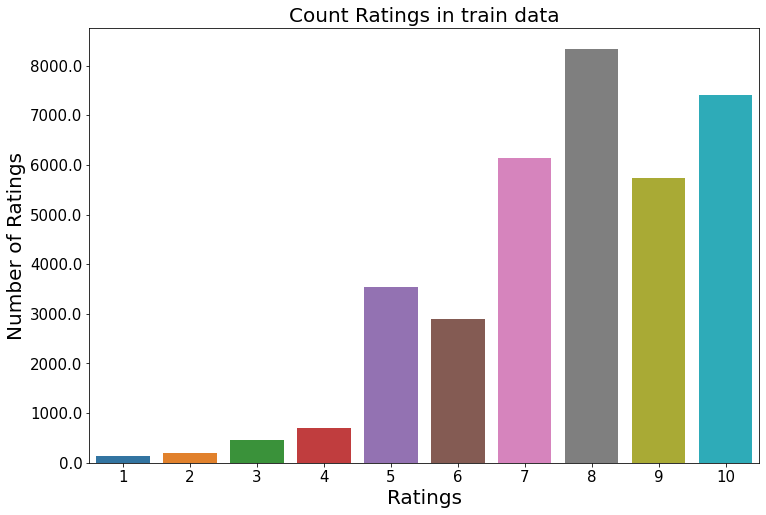

In [293]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="Book-Rating", data=data)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in train data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [294]:
no_rated_movies_per_user = train_data.groupby(by = "User-ID")["Book-Rating"].count().sort_values(ascending = False)
no_rated_movies_per_user.head()

User-ID
153662    263
101851    160
35433     132
49144     129
16795     125
Name: Book-Rating, dtype: int64

In [300]:
no_ratings_per_movie = train_data.groupby(by = "ISBN")["Book-Rating"].count().sort_values(ascending = False)
no_ratings_per_movie.head()

ISBN
043935806X    99
059035342X    98
044021145X    79
067976402X    59
044023722X    56
Name: Book-Rating, dtype: int64

In [312]:
def get_user_item_sparse_matrix(df):
    sparse_data = csr_matrix(df.values)
    return sparse_data

In [310]:
train_data.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

ISBN,000104799X,000160418X,000222674X,000225056X,000225946X,000412913X,000458726X,000470973X,000617616X,000636988X,...,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000DAPP1,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B0001FZGRQ,B0001GMSV2,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
183,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
242,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
254,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
388,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
392,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220343,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
220564,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
220597,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [316]:
train_sparse_data = get_user_item_sparse_matrix(train_data.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0))

In [317]:
test_sparse_data = get_user_item_sparse_matrix(test_data.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0))

In [318]:
global_average_rating = train_sparse_data.sum()/train_sparse_data.count_nonzero()
print("Global Average Rating: {}".format(global_average_rating))

Global Average Rating: 7.727384680342


In [319]:
def get_average_rating(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_ratings = sparse_matrix.sum(axis = ax).A1  
    no_of_ratings = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_ratings = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(rows if is_user else cols) if no_of_ratings[i] != 0}
    return average_ratings

In [320]:
average_rating_user = get_average_rating(train_sparse_data, True)

In [321]:
avg_rating_movie = get_average_rating(train_sparse_data, False)

In [325]:
total_users = len(np.unique(data["User-ID"]))
train_users = len(average_rating_user)
uncommonUsers = total_users - train_users
                  
print("Total no. of Users = {}".format(total_users))
print("No. of Users in train data= {}".format(train_users))
print("No. of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total no. of Users = 4777
No. of Users in train data= 3764
No. of Users not present in train data = 1013(21.0%)


In [338]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
# import xgboost as xgb

In [339]:
def compute_movie_similarity_count(sparse_matrix, movie_titles_df, movie_id):
    
    similarity = cosine_similarity(sparse_matrix.T, dense_output = False)
    no_of_similar_movies = movie_titles_df.loc[movie_id][1], similarity[movie_id].count_nonzero()
    return no_of_similar_movies

In [340]:
similar_movies = compute_movie_similarity_count(train_sparse_data, data, 1775)
print("Similar Movies = {}".format(similar_movies))

Similar Movies = ('france', 3)


In [333]:
def get_sample_sparse_matrix(sparseMatrix, n_users, n_movies):
    from scipy import sparse
    users, movies, ratings = sparse.find(sparseMatrix)
    uniq_users = np.unique(users)
    uniq_movies = np.unique(movies)
    np.random.seed(15) 
    userS = np.random.choice(uniq_users, n_users, replace = False)
    movieS = np.random.choice(uniq_movies, n_movies, replace = False)
    mask = np.logical_and(np.isin(users, userS), np.isin(movies, movieS))
    sparse_sample = sparse.csr_matrix((ratings[mask], (users[mask], movies[mask])), 
                                                     shape = (max(userS)+1, max(movieS)+1))
    return sparse_sample

In [331]:
from scipy import sparse

In [356]:
train_sample_sparse_matrix = get_sample_sparse_matrix(train_sparse_data, 400, 40)

In [357]:
test_sparse_matrix_matrix = get_sample_sparse_matrix(test_sparse_data, 200, 20)

In [358]:
def create_new_similar_features(sample_sparse_matrix):
    global_avg_rating = get_average_rating(sample_sparse_matrix, False)
    global_avg_users = get_average_rating(sample_sparse_matrix, True)
    global_avg_movies = get_average_rating(sample_sparse_matrix, False)
    sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_sparse_matrix)
    new_features_csv_file = open("new_features.csv", mode = "w")
    
    for user, movie, rating in zip(sample_train_users, sample_train_movies, sample_train_ratings):
        similar_arr = list()
        similar_arr.append(user)
        similar_arr.append(movie)
        similar_arr.append(sample_sparse_matrix.sum()/sample_sparse_matrix.count_nonzero())
        
        similar_users = cosine_similarity(sample_sparse_matrix[user], sample_sparse_matrix).ravel()
        indices = np.argsort(-similar_users)[1:]
        ratings = sample_sparse_matrix[indices, movie].toarray().ravel()
        top_similar_user_ratings = list(ratings[ratings != 0][:5])
        top_similar_user_ratings.extend([global_avg_rating[movie]] * (5 - len(ratings)))
        similar_arr.extend(top_similar_user_ratings)
        
        similar_movies = cosine_similarity(sample_sparse_matrix[:,movie].T, sample_sparse_matrix.T).ravel()
        similar_movies_indices = np.argsort(-similar_movies)[1:]
        similar_movies_ratings = sample_sparse_matrix[user, similar_movies_indices].toarray().ravel()
        top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
        top_similar_movie_ratings.extend([global_avg_users[user]] * (5-len(top_similar_movie_ratings)))
        similar_arr.extend(top_similar_movie_ratings)
        
        similar_arr.append(global_avg_users[user])
        similar_arr.append(global_avg_movies[movie])
        similar_arr.append(rating)
        
        new_features_csv_file.write(",".join(map(str, similar_arr)))
        new_features_csv_file.write("\n")
        
    new_features_csv_file.close()
    new_features_df = pd.read_csv('new_features.csv', names = ["user_id", "movie_id", "gloabl_average", "similar_user_rating1", 
                                                               "similar_user_rating2", "similar_user_rating3", 
                                                               "similar_user_rating4", "similar_user_rating5", 
                                                               "similar_movie_rating1", "similar_movie_rating2", 
                                                               "similar_movie_rating3", "similar_movie_rating4", 
                                                               "similar_movie_rating5", "user_average", 
                                                               "movie_average", "rating"]) 
    return new_features_df

In [359]:
train_new_similar_features = create_new_similar_features(train_sample_sparse_matrix)
train_new_similar_features

,user_id,movie_id,gloabl_average,similar_user_rating1,similar_user_rating2,similar_user_rating3,similar_user_rating4,similar_user_rating5,similar_movie_rating1,similar_movie_rating2,similar_movie_rating3,similar_movie_rating4,similar_movie_rating5,user_average,movie_average,rating
0,1585,1490,8.625,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,nan,nan,nan,nan,nan
1,1286,2631,8.625,9.000,9.000,9.000,9.000,9.000,9.000,9.000,9.000,nan,nan,nan,nan,nan
2,611,3972,8.625,9.000,9.000,9.000,9.000,9.000,9.000,9.000,9.000,nan,nan,nan,nan,nan
3,1152,4655,8.625,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,nan,nan,nan,nan,nan
4,2823,7990,8.625,9.000,9.000,9.000,9.000,9.000,9.000,9.000,9.000,nan,nan,nan,nan,nan
5,1653,9134,8.625,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,nan,nan,nan,nan,nan
6,272,15250,8.625,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,nan,nan,nan,nan
7,3628,15250,8.625,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,nan,nan,nan,nan


In [347]:
test_new_similar_features = create_new_similar_features(test_sparse_matrix_matrix)
test_new_similar_features.head()

,user_id,movie_id,gloabl_average,similar_user_rating1,similar_user_rating2,similar_user_rating3,similar_user_rating4,similar_user_rating5,similar_movie_rating1,similar_movie_rating2,similar_movie_rating3,similar_movie_rating4,similar_movie_rating5,user_average,movie_average,rating
0,185,638,6.833,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,nan,nan,nan,nan,nan
1,227,684,6.833,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,nan,nan,nan,nan,nan
2,178,2730,6.833,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,nan,nan,nan,nan,nan
3,455,3216,6.833,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,nan,nan,nan,nan,nan
4,145,3367,6.833,8.000,8.000,8.000,8.000,8.000,8.000,8.000,8.000,nan,nan,nan,nan,nan
5,41,3805,6.833,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,nan,nan,nan,nan,nan


In [349]:
x_train = train_new_similar_features.drop(["user_id", "movie_id", "rating"], axis = 1)
x_test = test_new_similar_features.drop(["user_id", "movie_id", "rating"], axis = 1)
y_train = train_new_similar_features["rating"]
y_test = test_new_similar_features["rating"]

In [ ]:
rating_count=

In [399]:
rating=rating[rating['Book-Rating']>0]

In [402]:
from sklearn.utils import shuffle
TRAIN_SIZE = 0.7
rating = shuffle(rating)
cutoff = int(TRAIN_SIZE * len(rating))
ratings_train = rating.iloc[:cutoff]
ratings_test = rating.iloc[cutoff:]


In [403]:
ratings_train

,User-ID,ISBN,Book-Rating
84322,63714,8404,9
82614,116160,18781,7
365,35433,36515,9
80696,208600,7851,10
45189,182993,4616,9
...,...,...,...
22705,80803,31176,8
97193,112709,24602,8
53779,75860,12916,7
16417,77039,41398,9


In [429]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, multiply,concatenate
from tensorflow.keras.layers import Dense, Concatenate, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

In [405]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

sc=LabelEncoder()
rating['ISBN']=sc.fit_transform(rating['ISBN'])

In [413]:
rating['User-ID'].max()

278851

In [411]:
rating['ISBN'].max()

22221

In [422]:
# Variable 초기화 
K = 200                             # Latent factor 수 
reg = 0.0001                        # Regularization penalty
mu = ratings_train['Book-Rating'].mean()    # 전체 평균 
M = rating['User-ID'].nunique() + 1       # Number of users
N = rating['ISBN'].max() + 1      # Number of movies

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Keras model
user = Input(shape=(1, ))                                               # User input
item = Input(shape=(1, ))                                               # Item input
P_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(user)     # (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(item)     # (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(user)       # User bias term (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(item)       # Item bias term (N, 1, )
P_embedding = Flatten()(P_embedding)                                    # (N, K)
Q_embedding = Flatten()(Q_embedding)                                    # (N, K)
user_bias = Flatten()(user_bias)                                        # (N, K)
item_bias = Flatten()(item_bias)                                        # (N, K)

R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])     # (N, 2K + 2)

# Neural network
R = Dense(2048)(R)
R = Activation('linear')(R)

# Adding more layers
R = Dense(1024)(R)
R = Activation('linear')(R)
R = Dense(512)(R)
R = Activation('linear')(R)

R = Dense(1)(R)

model = Model(inputs=[user, item], outputs=R)
model.compile(
  loss=RMSE,
  optimizer=SGD(lr=0.001, momentum=0.9),
  #optimizer=Adamax(lr=0.001),
  metrics=[RMSE],
)
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 1, 200)       955600      input_13[0][0]                   
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 1, 200)       4444400     input_14[0][0]                   
______________________________________________________________________________________

In [423]:
ratings_train['User-ID'].values.sum()

3399385706

In [431]:
model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_36 (Embedding)        (None, 1, 200)       955600      input_19[0][0]                   
__________________________________________________________________________________________________
embedding_37 (Embedding)        (None, 1, 200)       4444400     input_20[0][0]                   
______________________________________________________________________________________

In [432]:
result = model.fit(
  x=[ratings_train['User-ID'].values, ratings_train['ISBN'].values],
  y=ratings_train['Book-Rating'].values - mu,
  epochs=10,
  batch_size=256,
  validation_data=(
    [ratings_test['User-ID'].values, ratings_test['ISBN'].values],
    ratings_test['Book-Rating'].values - mu
  )
)

Epoch 1/10


InvalidArgumentError:  indices[0,0] = 43910 is not in [0, 4778)
	 [[node functional_15/embedding_38/embedding_lookup (defined at <ipython-input-432-4255017a03c7>:1) ]] [Op:__inference_train_function_10085]

Errors may have originated from an input operation.
Input Source operations connected to node functional_15/embedding_38/embedding_lookup:
 functional_15/embedding_38/embedding_lookup/9739 (defined at C:\Users\gommg\anaconda3\envs\basic\lib\contextlib.py:113)

Function call stack:
train_function


In [465]:
data=pd.read_csv('br_data.csv');data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,183,portugal,27.000,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A."
1,183,portugal,27.000,8440630794,7,Cuentos del Planeta Tierra,Arthur C. Clarke,1993,Ediciones B
2,183,portugal,27.000,8476409419,8,Estudios sobre el amor,Jose Ortega Y Gaset,2001,Downtown Book Center
3,242,germany,37.000,3257203659,9,Der illustrierte Mann. Erz?짚hlungen.,Ray Bradbury,2002,Diogenes
4,242,germany,37.000,3257207522,10,Der K?쨋nig in Gelb.,Raymond Chandler,1980,Diogenes Verlag
...,...,...,...,...,...,...,...,...,...
35548,278843,usa,28.000,1561580880,7,Easy Guide to Sewing Skirts (Sewing Companion ...,Marcy Tilton,1995,Taunton Press
35549,278851,usa,33.000,067161746X,7,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books
35550,278851,usa,33.000,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson
35551,278851,usa,33.000,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation


In [495]:
sc=LabelEncoder()
data['ISBN']=sc.fit_transform(data['ISBN'])

In [496]:
data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,183,portugal,27.000,19624,9,6612,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A."
1,183,portugal,27.000,20724,7,3470,Arthur C. Clarke,1993,Ediciones B
2,183,portugal,27.000,21194,8,6437,Jose Ortega Y Gaset,2001,Downtown Book Center
3,242,germany,37.000,15979,9,4442,Ray Bradbury,2002,Diogenes
4,242,germany,37.000,15986,10,4255,Raymond Chandler,1980,Diogenes Verlag
...,...,...,...,...,...,...,...,...,...
35548,278843,usa,28.000,7365,7,5593,Marcy Tilton,1995,Taunton Press
35549,278851,usa,33.000,3193,7,16992,P.J. O'Rourke,1987,Pocket Books
35550,278851,usa,33.000,6756,8,11269,H. Jackson Brown,1991,Thomas Nelson
35551,278851,usa,33.000,8860,10,3617,Mapsco,1999,American Map Corporation


In [523]:
import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [511]:
from sklearn.model_selection import train_test_split
# X = rating.iloc[:,:-1]
X = data.drop('Book-Rating',axis=1)
# Y = rating.iloc[:,-1]
Y = data['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 66)

In [512]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(rating['User-ID'].unique()), len(rating['ISBN'].unique()) 
n_users, n_movies = data['User-ID'].max()+1, data['ISBN'].max()+1 
print(n_users,n_movies)

278852 22222


In [513]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)



# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)




# Concatenate Product
merged_vectors = concatenate([user_vector, movie_vector], name='Concantenate')
dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 
# dense_layer_1 = Dropout(0.25) (dense_layer_1)
# batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
# dense_layer_2 = Dense(64, activation='relu')(merged_vectors)


result = Dense(1)(dense_layer_1)
model = Model([user_input, movie_input], result)
model.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User_Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie_Input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
User_Embedding (Embedding)      (None, 1, 50)        13942600    User_Input[0][0]                 
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 50)        1111100     Movie_Input[0][0]                
______________________________________________________________________________________

In [525]:
optimizer = tf.keras.optimizers.Adam(lr=0.0002)

In [524]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [527]:
batch_size = 256
epochs = 15

In [528]:
x_train

,User-ID,Location,Age,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
23735,180571,germany,52.000,17022,10496,Joy Fielding,1992,Goldmann
8366,65258,usa,42.000,8332,1030,John Kenkel,2002,CRC Press
29882,231210,usa,44.000,13513,14697,Deborah Morris,1995,Real Kids Real Adventures
16563,125303,germany,25.000,19134,16418,Doris Dewitz,1996,Gr?짚fe &amp Unzer
8530,66878,usa,42.000,8331,17394,George Hendrick,2004,Ivan R. Dee Publisher
...,...,...,...,...,...,...,...,...
31381,242409,france,23.000,6334,8611,Yuval Taylor,1999,Lawrence Hill Books
5199,39281,usa,45.000,8622,1128,Andre Norton,1994,Doubleday Books
8243,63714,unitedkingdom,29.000,13725,7465,Josh Blaylock,2004,Devil's Due Publishing
8823,69332,germany,32.000,15863,4772,Thomas Lau,1992,Walter De Gruyter Inc


In [529]:
history = model.fit(x=[x_train['User-ID'].values, x_train['ISBN'].values], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 1, validation_data=([x_test['User-ID'].values, x_test['ISBN'].values], y_test))

Epoch 1/15


TypeError: in user code:

    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    <ipython-input-523-91506697ad52>:3 root_mean_squared_error  *
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\math_ops.py:1140 binary_op_wrapper
        raise e
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\math_ops.py:1124 binary_op_wrapper
        return func(x, y, name=name)
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\math_ops.py:526 subtract
        return gen_math_ops.sub(x, y, name)
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\gen_math_ops.py:10465 sub
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\gommg\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py:503 _apply_op_helper
        raise TypeError(

    TypeError: Input 'y' of 'Sub' Op has type int64 that does not match type float32 of argument 'x'.


In [520]:
score = model.evaluate([x_test['User-ID'], x_test['ISBN']], y_test)

print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

334/334 [==============================] - 0s 429us/step - loss: 5.6647

RMSE: 2.3801


In [530]:
data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,183,portugal,27.000,19624,9,6612,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A."
1,183,portugal,27.000,20724,7,3470,Arthur C. Clarke,1993,Ediciones B
2,183,portugal,27.000,21194,8,6437,Jose Ortega Y Gaset,2001,Downtown Book Center
3,242,germany,37.000,15979,9,4442,Ray Bradbury,2002,Diogenes
4,242,germany,37.000,15986,10,4255,Raymond Chandler,1980,Diogenes Verlag
...,...,...,...,...,...,...,...,...,...
35548,278843,usa,28.000,7365,7,5593,Marcy Tilton,1995,Taunton Press
35549,278851,usa,33.000,3193,7,16992,P.J. O'Rourke,1987,Pocket Books
35550,278851,usa,33.000,6756,8,11269,H. Jackson Brown,1991,Thomas Nelson
35551,278851,usa,33.000,8860,10,3617,Mapsco,1999,American Map Corporation


In [538]:
# Variable 초기화 
K = 100                           # Latent factor 수 
reg = 0.0001                      # Regularization penalty
mu = data['Book-Rating'].mean()    # 전체 평균 
M = data['User-ID'].max() + 1       # Number of users
N = data['ISBN'].max() + 1      # Number of movies

In [539]:
user = Input(shape=(1, ))                                               # User input
item = Input(shape=(1, ))                                               # Item input
P_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(user)     # (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(item)     # (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(user)       # User bias term (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(item)       # Item bias term (N, 1, )

R=multiply([P_embedding,Q_embedding])
R=concatenate([R,user_bias,item_bias])
R = Flatten()(R)
R = Dense(10, activation="relu")(R)
R= Dropout(0.3)(R)
R = Dense(1)(R)
model = Model(inputs=[user, item], outputs=R)
model.compile(
  loss=RMSE,
   # optimizer=SGD(lr=0.001, momentum=0.9),
    # optimizer=RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0),
  # optimizer=Adam(lr=0.001),
   optimizer='adam',
  metrics=[RMSE]
)

In [540]:
history = model.fit(x=[x_train['User-ID'].values, x_train['ISBN'].values], y=y_train-mu, 
                    batch_size= batch_size, 
                    epochs=epochs, 
                    verbose= 1, validation_data=([x_test['User-ID'].values, x_test['ISBN'].values], y_test-mu))

Epoch 1/15
98/98 [==============================] - 25s 251ms/step - loss: 2.2504 - RMSE: 1.8218 - val_loss: 1.8357 - val_RMSE: 1.8354
Epoch 2/15
98/98 [==============================] - 25s 250ms/step - loss: 1.8172 - RMSE: 1.8180 - val_loss: 1.8257 - val_RMSE: 1.8253
Epoch 3/15
98/98 [==============================] - 25s 252ms/step - loss: 1.7892 - RMSE: 1.7852 - val_loss: 1.7963 - val_RMSE: 1.7948
Epoch 4/15
98/98 [==============================] - 24s 249ms/step - loss: 1.7203 - RMSE: 1.7174 - val_loss: 1.7514 - val_RMSE: 1.7480
Epoch 5/15
98/98 [==============================] - 25s 251ms/step - loss: 1.6164 - RMSE: 1.6121 - val_loss: 1.7091 - val_RMSE: 1.7035
Epoch 6/15
98/98 [==============================] - 25s 253ms/step - loss: 1.5056 - RMSE: 1.4999 - val_loss: 1.6828 - val_RMSE: 1.6748
Epoch 7/15
98/98 [==============================] - 24s 247ms/step - loss: 1.3750 - RMSE: 1.3639 - val_loss: 1.6765 - val_RMSE: 1.6662
Epoch 8/15
98/98 [==============================] - 24s